# **TRABALHO DE GRUPO**

> Elementos do grupo:


*   103- Joana Vale
*   109- Monique Souza

In [0]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Montar Google Drive para importar CSV:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
#df = pd.read_csv(io.StringIO(uploaded['empresas.csv'].decode('utf-8')))
url = '/content/gdrive/My Drive/TR_Powerpuff_Girls/empresas.csv'
df = pd.read_csv(url)
df

,Cidade,Distrito,Codigo_Postal,Ano,Total_Pop,DesempregadosIEFP,DespCamaraMunicipal_ME,RecCamaraMunicipal_ME,SaldoFinanceiroCamaraMunicipal_ME,Criminalidade_MH,ConsumoEnergKWH,like_facebook,FotosCronologiaFB,Seguidores_FB,Cidade_Instagram,Nome,NIF,Localidade,UltimoAnoDados,ProveitosOperacionais,CodCNAE,NumFuncionarios,DepBancCaixa,EndividUltAnoDísp,NumEmpUltAnoDisp,ResultOperUltAnoDisp
0,Aveiro,Aveiro,3800-000,2010,78274,4047,44342.4,46047.7,1705,53.2,8410.1,41458,5181,42423,663067,PRIMAVERAPRODUTOSALIMENTARESLDA,501460365,OliveiradeAzemeis,12/31/2008,0.0000,4711,1,0.0000,1450.524,0,-0.1730
1,Aveiro,Aveiro,3800-000,2010,78274,4047,44342.4,46047.7,1705,53.2,8410.1,41458,5181,42423,663067,NOVAPRIMAVERALDA,513661999,ValedoGrou,12/31/2015,0.0000,5610,1,0.0000,NaN,0,-0.4350
2,Aveiro,Aveiro,3800-000,2010,78274,4047,44342.4,46047.7,1705,53.2,8410.1,41458,5181,42423,663067,FATIASDEPRIMAVERAUNIPESSOALLDA,513998110,OliveiradeAzemeis,12/31/2017,0.0000,1071,1,0.0152,151.624,1,0.0000
3,Aveiro,Aveiro,3800-000,2010,78274,4047,44342.4,46047.7,1705,53.2,8410.1,41458,5181,42423,663067,AASINDUSTRIADEMOVEISLDA,500378444,SantaMariadeLamas,12/31/2018,0.0000,9524,1,0.9348,46.729,0,-0.0800
4,Aveiro,Aveiro,3800-000,2010,78274,4047,44342.4,46047.7,1705,53.2,8410.1,41458,5181,42423,663067,FLORDAPRIMAVERASUPERMERCADOSLDA,503809098,PontedeVagos,12/31/2016,1.9386,4711,1,100.5814,0.000,0,1.6779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,VilaReal,VilaReal,5000-000,2018,49910,2613,26298.5,27006.7,708,25.3,0.0,31438,6320,32391,129810,AMARELOPRIMAVERAUNIPESSOALLDA,509007678,PinhaoCele,12/31/2013,0.0000,811,1,2.6629,148.060,1,0.0000
432,VilaReal,VilaReal,5000-000,2018,49910,2613,26298.5,27006.7,708,25.3,0.0,31438,6320,32391,129810,VERTICEDAPRIMAVERALDA,510104940,Barreiros,12/31/2018,8.3294,811,2,11.0563,104.977,2,-497.6396
433,VilaReal,VilaReal,5000-000,2018,49910,2613,26298.5,27006.7,708,25.3,0.0,31438,6320,32391,129810,EXPLOSAODEPRIMAVERAUNIPESSOALLDA,510077544,PortelaFolhadela,12/31/2015,29.6191,5610,4,2.3474,1751.052,4,-40.8408
434,VilaReal,VilaReal,5000-000,2018,49910,2613,26298.5,27006.7,708,25.3,0.0,31438,6320,32391,129810,APAPRIMAVERALDA,510935575,PesodaRegua,12/31/2018,75.4070,4722,2,1.0320,536.870,2,-4.1960


# **1º Qual o Distrito com maior quantidade de empresas?**

In [5]:
x = df.groupby(['Distrito']).count()[['Nome']]
x.sort_values(by=['Nome'], ascending=False)

,Nome
Distrito,
Porto,118
Braga,98
Lisboa,98
Aveiro,34
Faro,22
Leiria,22
Beja,12
VilaReal,12
CasteloBranco,10


# **2º Qual o Distrito onde existe um volume de negócios mais elevado?**

In [6]:
x = df.groupby(['Distrito']).sum()[['ProveitosOperacionais']].round(1)
x.sort_values(by=['ProveitosOperacionais'], ascending=False)

,ProveitosOperacionais
Distrito,
Porto,2985306.4
Braga,552266.1
Lisboa,95025.5
Aveiro,13512.4
Leiria,4128.9
Beja,3098.6
CasteloBranco,1672.0
Faro,1457.9
Coimbra,820.5


# **3º Qual a sustentabilidade económica de cada distrito? (rendimento – despesas)**

In [7]:
x = df.groupby(['Distrito','Ano']).max()[['SaldoFinanceiroCamaraMunicipal_ME']]
x.sort_values(by=['Distrito','Ano','SaldoFinanceiroCamaraMunicipal_ME'], ascending=False)

SaldoFinanceiroCamaraMunicipal_ME
Distrito      Ano                                    
VilaReal      2018                                708
              2010                              -2085
Santarem      2018                               6161
              2010                               3789
Porto         2018                              16023
              2010                               2055
Lisboa        2018                             -32664
              2010                              36365
Leiria        2018                              13771
              2010                               2883
Faro          2018                               8596
              2010                               3453
Coimbra       2018                               5074
              2010                              -2618
CasteloBranco 2018                               2639
              2010                               2559
Braga         2018                               6029
              2010                               4659
Beja          2018                               1624
              2010                                213
Aveiro        2018                               -637
              2010                               1705

# **4º Qual o distrito com maior densidade populacional?**

In [8]:
x = df.groupby(['Distrito','Ano']).max()[['Total_Pop']]
x.sort_values(by=['Total_Pop'], ascending=False)

Total_Pop
Distrito      Ano            
Lisboa        2010     549210
              2018     506654
Porto         2010     239650
              2018     214936
Braga         2018     181651
              2010     180948
Coimbra       2010     143945
              2018     133940
Leiria        2010     126722
              2018     125082
Aveiro        2010      78274
              2018      77773
Faro          2010      64316
Santarem      2010      62453
Faro          2018      60947
Santarem      2018      57611
CasteloBranco 2010      56221
              2018      52448
VilaReal      2010      51875
              2018      49910
Beja          2010      35939
              2018      33677

# **5º Alguma(s) da(s) empresas apresenta(m) prejuízo?**

In [9]:
gx = df.groupby(['Nome']).mean()[['ProveitosOperacionais']]
gx.sort_values(by=['ProveitosOperacionais'], ascending=True).head(4)

#groups = df.groupby(['Nome'])[['ResultOperUltAnoDisp']]
#groups.apply(lambda g: g[g['ProveitosOperacionais'] < 0])

,ProveitosOperacionais
Nome,
MODELOCONTINENTESGPSSA,-286863.9825
SCHOSPITALITYSA,-4704.9530
UPINVESTSGPSSA,-3606.1686
SONAECAPITALSGPSSA,-3083.5090


# **6º Qual a empresa mais lucrativa?**

In [10]:
gx = df.groupby(['Nome']).mean()[['ProveitosOperacionais']]
gx.sort_values(by=['ProveitosOperacionais'], ascending=False).head(1)

,ProveitosOperacionais
Nome,
SONAESPECIALIZEDRETAILSGPSSA,432781.8504


# **7º Qual a média do Resultado Operacional das empresas, por ano e por distrito? A Distribuição é normal? Porquê?**

In [11]:
gx = df.groupby(['Nome','Ano','Distrito']).mean()[['ResultOperUltAnoDisp']]
gx.sort_values(by=['Nome','Ano','Distrito','ResultOperUltAnoDisp'], ascending=True)

ResultOperUltAnoDisp
Nome                                 Ano  Distrito                      
AASINDUSTRIADEMOVEISLDA              2010 Aveiro                 -0.0800
                                     2018 Aveiro                 -0.0800
ACTOSDEPRIMAVERALDA                  2010 Braga                 319.5875
                                     2018 Braga                 319.5875
ADIVINHAPRIMAVERALDA                 2010 Faro                   11.1685
...                                                                  ...
VARANDASDAPRIMAVERAEMPREENDIMENTOSSA 2018 Faro                    0.0000
VERTICEDAPRIMAVERALDA                2010 VilaReal             -497.6396
                                     2018 VilaReal             -497.6396
VOZESDAPRIMAVERALDA                  2010 Braga                 -15.5519
                                     2018 Braga                 -15.5519

[432 rows x 1 columns]

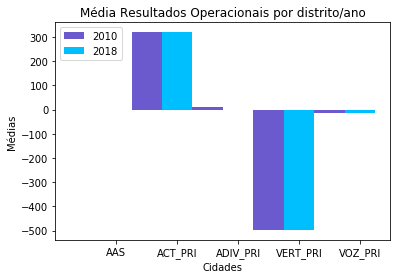

In [12]:
#Histograma:

media_2010 = [-0.08, 319.5875, 11.1685, -497.6396, -15.5519]
media_2018 = [-0.08,319.5875, 0, -497.6396,-15.5519]

#definir a largura das barrar
barWidth = 0.5

#definir a posição das barras
r1 = np.arange(len(media_2010))
r2 = [x + barWidth for x in r1]

#criar as barras
plt.bar(r1, media_2010, color='#6A5ACD', width=barWidth, label='2010')
plt.bar(r2, media_2018, color='#00BFFF', width=barWidth, label='2018')

#adicionar legendas às barras
plt.xlabel('Cidades')
plt.xticks([r + barWidth for r in range (len(media_2010))], ['AAS', 'ACT_PRI', 'ADIV_PRI', 'VERT_PRI', 'VOZ_PRI'])
plt.ylabel('Médias')
plt.title('Média Resultados Operacionais por distrito/ano')

#criar legenda e mostrar gráfico
plt.legend(loc='upper left')
plt.show()

In [0]:
# Como os dados encontram-se dispersos então não existe evidencias de seguir uma distribuição normal.

# **8º Qual o distrito com melhor desempenho nas redes sociais, porquê?**

In [13]:
gx = df.groupby(['Distrito']).agg(
    {
         'like_facebook':max, # Max like_facebook per Distrito
         'Seguidores_FB': max,
         'Cidade_Instagram': max  
    }
)
gx.sort_values(by=['Cidade_Instagram'], ascending=False)

,like_facebook,Seguidores_FB,Cidade_Instagram
Distrito,,,
Lisboa,396818,404965,10541541
Porto,125608,128148,8055403
Faro,27480,28573,1377512
Braga,98185,104940,848859
Coimbra,43144,44654,787138
Aveiro,41458,42423,663067
Leiria,42144,43347,279808
Santarem,17035,18783,235854
VilaReal,31438,32391,129810


# **9º Qual a o resultado operacional por funcionário / ano? (Resultado Operacional / Nº funcionários)**

In [14]:
rep2 = df.groupby(['Nome', 'Ano', 'NumFuncionarios'], as_index=False)['ResultOperUltAnoDisp'].sum()
rep2['ResultadoOperacionalPorFuncionario'] = rep2['ResultOperUltAnoDisp'] / rep2['NumFuncionarios']
rep2.sort_values(by=['ResultadoOperacionalPorFuncionario'], ascending=False)

,Nome,Ano,NumFuncionarios,ResultOperUltAnoDisp,ResultadoOperacionalPorFuncionario
400,SONAESPECIALIZEDRETAILSGPSSA,2010,1,417682.0112,417682.0112
401,SONAESPECIALIZEDRETAILSGPSSA,2018,1,417682.0112,417682.0112
178,MODELOCONTINENTESGPSSA,2010,1,105534.8065,105534.8065
179,MODELOCONTINENTESGPSSA,2018,1,105534.8065,105534.8065
189,OPTIMUSSGPSSA,2018,1,49325.5376,49325.5376
...,...,...,...,...,...
89,DSTSGPSSA,2018,1,-2124.0354,-2124.0354
427,UPINVESTSGPSSA,2018,1,-3677.5041,-3677.5041
426,UPINVESTSGPSSA,2010,1,-3677.5041,-3677.5041
336,SCHOSPITALITYSA,2010,1,-4793.5290,-4793.5290


# **10º Elabore um gráfico que demonstre o desempenho dos distritos nas redes sociais, juntamente com a sua população total e o número de desempregados.**

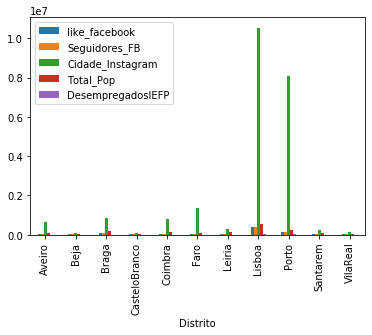

In [15]:
# a simple line plot
df.groupby(['Distrito']).agg(
    {
         'like_facebook':'mean',
         'Seguidores_FB': 'mean',
         'Cidade_Instagram': 'mean',
         'Total_Pop': 'mean',
         'DesempregadosIEFP': 'mean'
    }
).plot(kind='bar')

plt.rcParams["figure.figsize"] = (20,10)

plt.show()